# 1. Import packages

In [334]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
sns.set_style('white')

# warning
import warnings
warnings.filterwarnings('ignore')

# machine learning models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


# validation metric and others
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [385]:
filename = './data/bank-additional/bank-additional.csv'

# 2. Load dataset

bank-additional

Acquiring dataset of bank-additional using into pandas dataframes.

In [386]:
dataset = pd.read_csv(filename, sep=';')

# 3. Analyze the data structure

In [387]:
dataset.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## 3.1 dataset features

In [388]:
print(dataset.columns.values)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


## 3.2 dataset info

In [389]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


## 3.3 which features are numerical?



### 3.3.1 int type
1. Age
2. duration
3. campaign
4. pdays
5. previous

### 3.3.2 float type
1. emp.var.rate
2. cons.price.idx
3. cons.conf.idx
4. euribor3m
5. nr.employed

## 3.4 which features are categorical
1. job
2. marital
3. education
4. default
5. housing
6. loan
7. contact
8. month    
9. day_of_week
10. poutcome

## 3.5 Check null NAN value  or unknown values


### 3.5.1 NULL

In [390]:
dataset.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 3.5.2 unknown value

Only the features of job, marital, education, default, housing and loan have unknown values

In [393]:
for col in dataset.loc[:, dataset.dtypes == object].columns:
    temp = dataset[dataset[col] == 'unknown']
    if temp.size <= 0:
        continue
    print (temp[[col, 'y']].groupby(col).count())

          y
job        
unknown  39
          y
marital    
unknown  11
             y
education     
unknown    167
           y
default     
unknown  803
           y
housing     
unknown  105
           y
loan        
unknown  105


## 3.6 The distribution of numerical feature values

In [403]:
# Find the features that categorical

dataset.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
10%,28.800000,60.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.029000,5076.200000
20%,31.000000,89.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.299000,5099.100000
30%,33.000000,119.000000,1.000000,999.000000,0.000000,-1.700000,93.200000,-42.700000,1.405000,5099.100000
40%,35.000000,148.000000,1.000000,999.000000,0.000000,-0.100000,93.444000,-42.000000,4.153000,5191.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
60%,41.000000,222.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-40.000000,4.864000,5195.800000


## 3.7 查看一下非数值类型的分布

In [404]:
dataset.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


## 3.8 基于上面数据的猜想

# 4. 数据的处理

## 4.1 Categorical feature 处理

### 4.1.1 label y 的处理

In [405]:
le = LabelEncoder()
for data in dataset:
    dataset['y'] = le.fit_transform(dataset['y'])

In [406]:
len(dataset[dataset['y']==1])

451

通过这里我们可以看到，no和yes类别是非常不平衡的。

### 4.1.2 job的处理

通过上面的处理，我们发现job有39个 unknown 的值
所以这里就有一个问题就是如何对categorical feature 进行imputation。
因为它的比例非常的少，所有这里我们就把它drop掉了
1. drop unknown的数据
2. 对job进行编码 label（先看下使用label编码的效果，如果不好换成one-hot 编码试一下）

In [408]:
# 删掉job unknown 的data
dataset = dataset[~dataset['job'].isin(['unknown'])]

In [409]:
dataset[['job', 'y']].groupby('job').mean()

,y
job,
admin.,0.131423
blue-collar,0.069005
entrepreneur,0.054054
housemaid,0.100000
management,0.092593
retired,0.228916
self-employed,0.081761
services,0.089059
student,0.231707


In [410]:
# replace rare data

In [411]:
dataset[['job', 'y']].groupby('job').count()

,y
job,
admin.,1012
blue-collar,884
entrepreneur,148
housemaid,110
management,324
retired,166
self-employed,159
services,393
student,82


In [412]:
# 对 job进行 label encoding
# one-hot encoding 虽然好，但是会增加太多的features，计算量上会增加很多
dataset['job'] = le.fit_transform(dataset['job'])
dataset['job'].head()

0    1
1    7
2    7
3    7
4    0
Name: job, dtype: int64

In [413]:
dataset[['job', 'y']].groupby('job').mean()

,y
job,
0,0.131423
1,0.069005
2,0.054054
3,0.100000
4,0.092593
5,0.228916
6,0.081761
7,0.089059
8,0.231707


### 4.1.3 marital的处理
虽然marital中unknown 的数据也比较的少，但是因为它对y的影响还是比较高的，而且marital中类别不是很多，所以将unknown 一块编码，不做处理。

In [414]:
dataset[['marital', 'y']].groupby(['marital'], as_index=False).mean().sort_values(by='y', ascending=True)

,marital,y
3,unknown,0.090909
0,divorced,0.096847
1,married,0.099960
2,single,0.135490


In [415]:
dataset['marital'] = le.fit_transform(dataset['marital'])
dataset['marital'].head()

0    1
1    2
2    1
3    1
4    1
Name: marital, dtype: int64

In [416]:
dataset[['marital', 'y']].groupby('marital').count()

,y
marital,
0,444
1,2481
2,1144
3,11


### 4.1.4 education的处理
education 中unknown对y的影响还是挺高的， 直接进行 label 编码了

In [417]:
dataset['education'] = le.fit_transform(dataset['education'])
dataset['education'].head()

0    2
1    3
2    3
3    2
4    6
Name: education, dtype: int64

### 4.1.5 default的处理


In [418]:
dataset['default'] = le.fit_transform(dataset['default'])
dataset['default'].head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

### 4.1.6 housing的处理

In [419]:
dataset['housing'] = le.fit_transform(dataset['housing'])
dataset['housing'].head()

0    2
1    0
2    2
3    1
4    2
Name: housing, dtype: int64

### 4.1.7 loan 的处理

In [420]:
dataset['loan'] = le.fit_transform(dataset['loan'])
dataset['loan'].head()

0    0
1    0
2    0
3    1
4    0
Name: loan, dtype: int64

### 4.1.8 contact的处理

In [421]:
dataset['contact'] = le.fit_transform(dataset['contact'])
dataset['contact'].head()

0    0
1    1
2    1
3    1
4    0
Name: contact, dtype: int64

### 4.1.9 month的处理

In [422]:
dataset['month'] = le.fit_transform(dataset['month'])
dataset['month'].head()

0    6
1    6
2    4
3    4
4    7
Name: month, dtype: int64

### 4.1.10 day_of_week 的处理

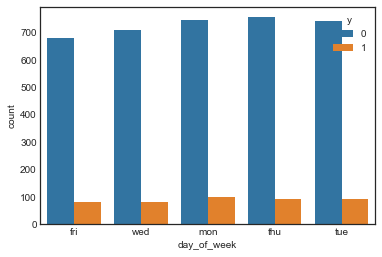

In [423]:
sns.countplot(dataset['day_of_week'], hue=dataset['y'])

In [424]:
dataset['day_of_week'] = le.fit_transform(dataset['day_of_week'])
dataset['day_of_week'].head()

0    0
1    0
2    4
3    0
4    1
Name: day_of_week, dtype: int64

### 4.1.11 poutcome

In [425]:
dataset['poutcome'] = le.fit_transform(dataset['poutcome'])
dataset['poutcome'].head()

0    1
1    1
2    1
3    1
4    1
Name: poutcome, dtype: int64

## 4.2 Numerical features 的处理

### 4.2.1 age 的处理

#### 如果我们看一下年龄的分布

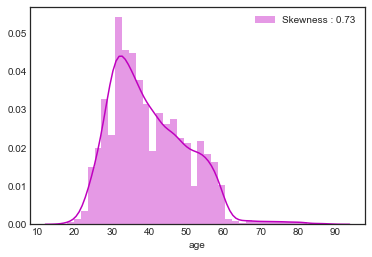

In [426]:
g = sns.distplot(dataset["age"], color="m", label="Skewness : %.2f"%(dataset["age"].skew()))
g = g.legend(loc="best")

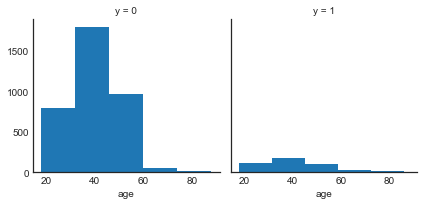

In [427]:

g = sns.FacetGrid(dataset, col='y')
g.map(plt.hist, 'age', bins=5)

In [428]:
# 将年龄进行等分操作 可以试一下 5 或 10 等分划分的效果
dataset['AgeBand'] = pd.cut(dataset['age'], 5)

In [432]:
dataset[['AgeBand', 'y']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,y
0,"(17.93, 32.0]",0.121908
1,"(32.0, 46.0]",0.085576
2,"(46.0, 60.0]",0.114286
3,"(60.0, 74.0]",0.372549
4,"(74.0, 88.0]",0.625000


In [239]:
# replace age with ordinals
dataset.loc[dataset['age'] <= 32, 'age'] = 0
dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 46), 'age'] = 1
dataset.loc[(dataset['age'] > 46) & (dataset['age'] <= 60), 'age'] = 2
dataset.loc[(dataset['age'] > 60) & (dataset['age'] <= 74), 'age'] = 3
dataset.loc[dataset['age'] > 74, 'age'] = 4

In [242]:
dataset['age'].head()

0    0
1    1
2    0
3    1
4    2
Name: age, dtype: int64

### 4.2.2 duration的处理

需要特别注意的是：如果duration 是0，那么 y='no'

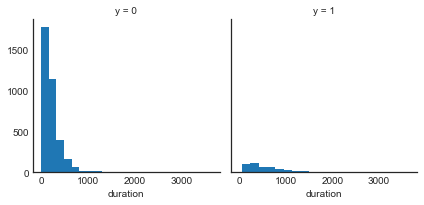

In [243]:
g = sns.FacetGrid(dataset, col='y')
g.map(plt.hist, 'duration', bins=20)

#### 看一下duration的分布情况

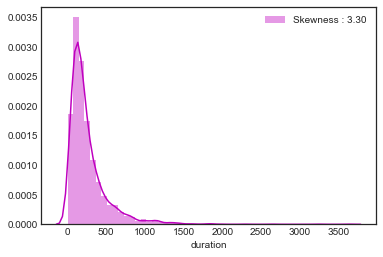

In [244]:
g = sns.distplot(dataset["duration"], color="m", label="Skewness : %.2f"%(dataset["duration"].skew()))
g = g.legend(loc="best")

In [245]:
# 因为分布很不均匀，我们一般通过log函数进行处理一下，并且离散化数据
dataset['duration'] = dataset['duration'].map(lambda x: int(np.log(x)) if x > 0 else 0)

In [246]:
dataset[['duration', 'y']].groupby(['duration'], as_index=False).mean().sort_values(by='y', ascending=True)

,duration,y
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.020833
5,5,0.099886
6,6,0.322476
8,8,0.500000
7,7,0.647887


In [247]:
dataset['duration'] = dataset['duration'].map({0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5})
dataset[['duration', 'y']].groupby(['duration'], as_index=False).mean().sort_values(by='y', ascending=True)

,duration,y
0,0,0.000000
1,1,0.020833
2,2,0.099886
3,3,0.322476
5,5,0.500000
4,4,0.647887


### 4.2.3 campaign

#### 先看下campaign 的分布情况

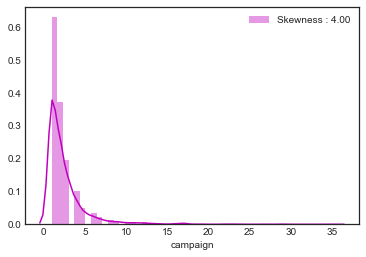

In [248]:
g = sns.distplot(dataset["campaign"], color="m", label="Skewness : %.2f"%(dataset["campaign"].skew()))
g = g.legend(loc="best")

#### campaign 的分布就很不均匀，我们可以通过log来处理一下

In [249]:
dataset['campaign'] = dataset['campaign'].map(lambda x: int(np.log(x)) if x > 0 else 0)

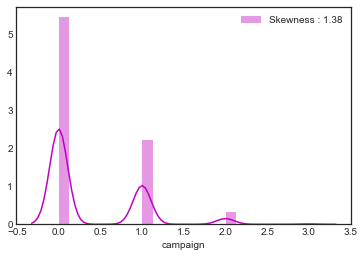

In [250]:
g = sns.distplot(dataset["campaign"], color="m", label="Skewness : %.2f"%(dataset["campaign"].skew()))
g = g.legend(loc="best")

#### 处理后我们发现，campaign 和 y 之间其实是一种负相关的关系

In [251]:
dataset[['campaign', 'y']].groupby('campaign', as_index=False).mean().sort_values(by='y', ascending=True)

,campaign,y
3,3,0.000000
2,2,0.030303
1,1,0.094942
0,0,0.120547


### 4.2.4 pdays的处理

#### 分析
因为pdays中999的数据非常多，有3000多条记录。而999代表的是一个客户之前没有被联系过。
所以我们需要非常小心的处理它，这里使用log进行处理感觉还是比较好的。

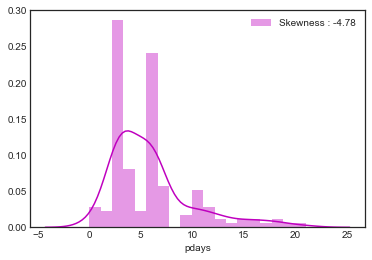

In [252]:
g = sns.distplot(dataset["pdays"][(dataset['pdays'] < 999)], color="m", label="Skewness : %.2f"%(dataset["pdays"].skew()))
g = g.legend(loc="best")

In [253]:
dataset['pdays'] = dataset['pdays'].map(lambda x: int(np.log(x)) if x > 0 else 0)

#### 处理后的相关性

In [254]:
dataset[['pdays', 'y']].groupby(['pdays'], as_index=False).mean().sort_values(by='y', ascending=True)

,pdays,y
4,6,0.088475
0,0,0.333333
2,2,0.464286
1,1,0.691667
3,3,1.000000


### 4.2.5 previous的处理

In [255]:
dataset[['previous', 'y']].groupby(['previous'], as_index=False).mean().sort_values(by='y', ascending=True)

,previous,y
0,0,0.082832
1,1,0.207627
2,2,0.421053
6,6,0.500000
3,3,0.600000
4,4,0.714286
5,5,1.000000


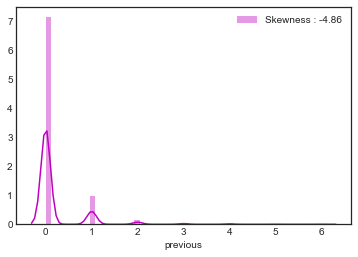

In [256]:
g = sns.distplot(dataset["previous"], color="m", label="Skewness : %.2f"%(dataset["pdays"].skew()))
g = g.legend(loc="best")

In [257]:
dataset[['previous', 'y']].groupby(['previous'], as_index=False).count().sort_values(by='y', ascending=True)

,previous,y
5,5,2
6,6,2
4,4,14
3,3,25
2,2,76
1,1,472
0,0,3489


#### 这里我们发现 5 6 4 3 2的次数非常少，我们把这几个合为一个

In [258]:
dataset['previous'] = dataset['previous'].replace([2, 3, 4, 5, 6], 3)

#### 经过处理以后，这种相关行就非常明显了

In [259]:
dataset[['previous', 'y']].groupby(['previous'], as_index=False).mean().sort_values(by='y', ascending=True)

,previous,y
0,0,0.082832
1,1,0.207627
2,3,0.504202


### 4.3 Float 类型的数据处理

#### 4.3.1 emp.var.rate

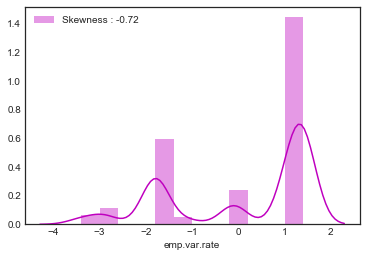

In [260]:
g = sns.distplot(dataset["emp.var.rate"], color="m", label="Skewness : %.2f"%(dataset["emp.var.rate"].skew()))
g = g.legend(loc="best")

In [181]:
dataset[['emp.var.rate', 'y']].groupby(['emp.var.rate'], as_index=False).mean().sort_values(by='y', ascending=True)

,emp.var.rate,y
2,1.1,0.033512
3,1.4,0.054071
0,-1.8,0.146591
1,0.0,0.243787


In [301]:
dataset['emp.var.rate'] = dataset['emp.var.rate'].replace([-0.2, -3.0, -1.1, -1.7, -3.4, -2.9, -0.1], 0)

AttributeError: 'Series' object has no attribute 'as_dtypes'

In [299]:
dataset['emp.var.rate'] = dataset['emp.var.rate'].replace({1.1: 1, 1.4: 2, -1.8: 3})

In [300]:
dataset[['emp.var.rate', 'y']].groupby(['emp.var.rate'], as_index=False).mean().sort_values(by='y', ascending=True)

,emp.var.rate,y
1,1.0,0.033512
2,2.0,0.054071
3,3.0,0.146591
0,0.0,0.243787


#### 4.3.2 cons.price.idx

In [442]:
g = sns.distplot(dataset["cons.price.idx"], color="m", label="Skewness : %.2f"%(dataset["cons.price.idx"].skew()))
g = g.legend(loc="best")

TypeError: Categorical cannot perform the operation skew

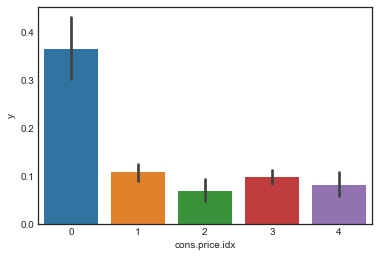

In [443]:
g = sns.barplot(x="cons.price.idx", y="y", data=dataset)

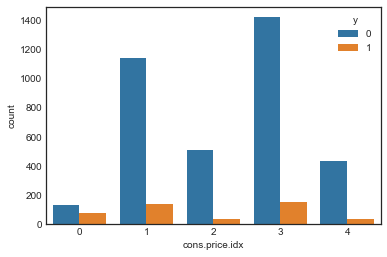

In [444]:
sns.countplot(dataset['cons.price.idx'], hue=dataset['y'])

In [445]:
dataset[['cons.price.idx', 'y']].groupby(['cons.price.idx'], as_index=False).mean().sort_values(by='y', ascending=True)

,cons.price.idx,y
2,2,0.069597
4,4,0.082803
3,3,0.098538
1,1,0.107897
0,0,0.364929


In [446]:
dataset['cons.price.idx'] = pd.cut(dataset['cons.price.idx'], 5, labels=[0, 1, 2, 3, 4])

dataset[['cons.price.idx', 'y']].groupby(['cons.price.idx'], as_index=False).mean().sort_values(by='cons.price.idx', ascending=True)

,cons.price.idx,y
0,0,0.364929
1,1,0.107897
2,2,0.069597
3,3,0.098538
4,4,0.082803


In [447]:
dataset.loc[dataset['cons.price.idx'] <= 92.714, 'cons.price.idx'] = 0

dataset.loc[(dataset['cons.price.idx'] > 92.714) & (dataset['cons.price.idx'] <= 93.227), 'cons.price.idx'] = 1
dataset.loc[(dataset['cons.price.idx'] > 93.227) & (dataset['cons.price.idx'] <= 93.742), 'cons.price.idx'] = 2
dataset.loc[(dataset['cons.price.idx'] > 93.741) & (dataset['cons.price.idx'] <= 94.254), 'cons.price.idx'] = 3
dataset.loc[(dataset['cons.price.idx'] > 94.254) & (dataset['cons.price.idx'] <= 94.767), 'cons.price.idx'] = 4
dataset['cons.price.idx'].head()

TypeError: Cannot compare a Categorical for op __le__ with a scalar, which is not a category.

In [266]:
dataset['cons.price.idx'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

count    4080.000000
mean       93.578748
std         0.579478
min        92.201000
10%        92.893000
20%        92.893000
30%        93.200000
40%        93.444000
50%        93.749000
60%        93.918000
70%        93.994000
80%        93.994000
90%        94.465000
99%        94.601000
max        94.767000
Name: cons.price.idx, dtype: float64

#### 上面可以看到消费的价格指数还是比较均匀的，而且方差非常的小，所以我认为这个feature对y的影响是没有那么大的。

#### 4.3.3 cons.conf.idx

In [267]:
dataset['cons.conf.idx'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

count    4080.000000
mean      -40.513701
std         4.598011
min       -50.800000
10%       -46.200000
20%       -46.200000
30%       -42.700000
40%       -42.000000
50%       -41.800000
60%       -40.000000
70%       -36.400000
80%       -36.400000
90%       -36.100000
99%       -26.900000
max       -26.900000
Name: cons.conf.idx, dtype: float64

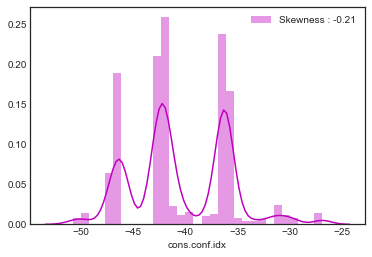

In [268]:
g = sns.distplot(dataset["cons.conf.idx"], color="m", label="Skewness : %.2f"%(dataset["cons.price.idx"].skew()))
g = g.legend(loc="best")

In [269]:
dataset[['cons.conf.idx', 'y']].groupby(['cons.conf.idx'], as_index=False).mean().sort_values(by='y', ascending=True)

,cons.conf.idx,y
5,-45.9,0.000000
16,-36.4,0.033512
17,-36.1,0.043977
7,-42.0,0.044041
8,-41.8,0.051522
6,-42.7,0.063733
4,-46.2,0.085859
3,-47.1,0.134328
20,-33.6,0.214286
24,-29.8,0.320000


In [270]:
dataset['conf_idx'] = pd.cut(dataset['cons.conf.idx'], 5)

dataset[['conf_idx', 'y']].groupby(['conf_idx'], as_index=False).mean().sort_values(by='conf_idx', ascending=True)

,conf_idx,y
0,"(-50.824, -46.02]",0.125000
1,"(-46.02, -41.24]",0.054990
2,"(-41.24, -36.46]",0.482301
3,"(-36.46, -31.68]",0.064179
4,"(-31.68, -26.9]",0.355932


In [271]:
dataset[['conf_idx', 'y']].groupby(['conf_idx'], as_index=False).mean().sort_values(by='conf_idx', ascending=True)

,conf_idx,y
0,"(-50.824, -46.02]",0.125000
1,"(-46.02, -41.24]",0.054990
2,"(-41.24, -36.46]",0.482301
3,"(-36.46, -31.68]",0.064179
4,"(-31.68, -26.9]",0.355932


In [272]:
dataset.loc[dataset['cons.conf.idx'] <= -46.02, 'cons.conf.idx'] = 0
dataset.loc[(dataset['cons.conf.idx'] > -46.02) & (dataset['cons.conf.idx'] <= -41.24), 'cons.conf.idx'] = 1
dataset.loc[(dataset['cons.conf.idx'] > -41.24) & (dataset['cons.conf.idx'] <= -36.46), 'cons.conf.idx'] = 2
dataset.loc[(dataset['cons.conf.idx'] > -36.46) & (dataset['cons.conf.idx'] <= -31.68), 'cons.conf.idx'] = 3
dataset.loc[(dataset['cons.conf.idx'] > -31.68) & (dataset['cons.conf.idx'] <= -26.9), 'cons.conf.idx'] = 4

In [273]:
dataset[['cons.conf.idx', 'y']].groupby(['cons.conf.idx'], as_index=False).mean().sort_values(by='cons.conf.idx', ascending=True)

,cons.conf.idx,y
0,0.0,0.125000
1,1.0,0.054990
2,2.0,0.482301
3,3.0,0.064179
4,4.0,0.355932


#### 4.3.4 euribor3m

In [274]:
dataset['euribor3m'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

count    4080.000000
mean        3.618363
std         1.733859
min         0.635000
10%         1.029000
20%         1.299000
30%         1.405000
40%         4.153000
50%         4.857000
60%         4.864000
70%         4.960000
80%         4.962000
90%         4.964000
99%         4.968000
max         5.045000
Name: euribor3m, dtype: float64

In [275]:
dataset['euribor3m_temp'] = pd.cut(dataset['euribor3m'], 5)
dataset[['euribor3m_temp', 'y']].groupby(['euribor3m_temp'], as_index=False).mean().sort_values(by='euribor3m_temp', ascending=True)

,euribor3m_temp,y
0,"(0.631, 1.517]",0.230710
1,"(1.517, 2.399]",0.565217
2,"(2.399, 3.281]",NaN
3,"(3.281, 4.163]",0.041935
4,"(4.163, 5.045]",0.048811


In [278]:
dataset.loc[dataset['euribor3m'] <= 1.517, 'euribor3m'] = 0
dataset.loc[(dataset['euribor3m'] > 1.517) & (dataset['euribor3m'] <= 2.399), 'euribor3m'] = 1
dataset.loc[(dataset['euribor3m'] > 3.281) & (dataset['euribor3m'] <= 4.163), 'euribor3m'] = 2
dataset.loc[(dataset['euribor3m'] > 4.163) & (dataset['euribor3m'] <= 5.045), 'euribor3m'] = 3
dataset[['euribor3m', 'y']].groupby(['euribor3m'], as_index=False).mean().sort_values(by='euribor3m', ascending=True)


,euribor3m,y
0,0.0,0.230710
1,1.0,0.565217
2,2.0,0.041935
3,3.0,0.048811


### 4.3.5 nr.employed

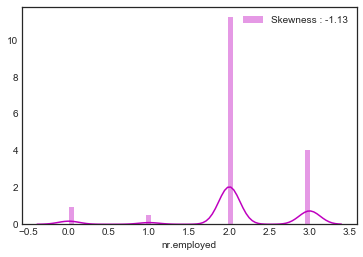

In [449]:
g = sns.distplot(dataset["nr.employed"], color="m", label="Skewness : %.2f"%(dataset["nr.employed"].skew()))
g = g.legend(loc="best")

In [450]:
dataset['nr.employed'] = pd.cut(dataset['nr.employed'], 5, labels=[0, 1, 2, 3, 4])


In [451]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 0 to 4118
Data columns (total 22 columns):
age               4080 non-null int64
job               4080 non-null int64
marital           4080 non-null int64
education         4080 non-null int64
default           4080 non-null int64
housing           4080 non-null int64
loan              4080 non-null int64
contact           4080 non-null int64
month             4080 non-null int64
day_of_week       4080 non-null int64
duration          4080 non-null int64
campaign          4080 non-null int64
pdays             4080 non-null int64
previous          4080 non-null int64
poutcome          4080 non-null int64
emp.var.rate      4080 non-null float64
cons.price.idx    4080 non-null category
cons.conf.idx     4080 non-null float64
euribor3m         4080 non-null float64
nr.employed       4080 non-null category
y                 4080 non-null int64
AgeBand           4080 non-null category
dtypes: category(3), float64(3), int64(16)

In [452]:
dataset[['nr.employed', 'y']].groupby(['nr.employed'], as_index=False).mean().sort_values(by='nr.employed', ascending=True)

,nr.employed,y
0,0,0.510917
1,1,0.406504
2,2,NaN
3,3,0.048035
4,4,0.151020


In [453]:
dataset['nr.employed'] = dataset['nr.employed'].map({0: 0, 1: 1, 3: 3, 4: 2})
dataset[['nr.employed', 'y']].groupby(['nr.employed'], as_index=False).mean().sort_values(by='nr.employed', ascending=True)

,nr.employed,y
0,2.0,0.15102


### 4.4 float data 转为int

In [310]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 0 to 4118
Data columns (total 21 columns):
age               4080 non-null int64
job               4080 non-null int64
marital           4080 non-null int64
education         4080 non-null int64
default           4080 non-null int64
housing           4080 non-null int64
loan              4080 non-null int64
contact           4080 non-null int64
month             4080 non-null int64
day_of_week       4080 non-null int64
duration          4080 non-null int64
campaign          4080 non-null int64
pdays             4080 non-null int64
previous          4080 non-null int64
poutcome          4080 non-null int64
emp.var.rate      4080 non-null float64
cons.price.idx    4080 non-null float64
cons.conf.idx     4080 non-null float64
euribor3m         4080 non-null float64
nr.employed       4080 non-null int64
y                 4080 non-null int64
dtypes: float64(4), int64(17)
memory usage: 861.2 KB


In [311]:
dataset['emp.var.rate'] = dataset['emp.var.rate'].astype(int)
dataset['cons.price.idx'] = dataset['cons.price.idx'].astype(int)
dataset['cons.conf.idx'] = dataset['cons.conf.idx'].astype(int)
dataset['euribor3m'] = dataset['euribor3m'].astype(int)


In [312]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 0 to 4118
Data columns (total 21 columns):
age               4080 non-null int64
job               4080 non-null int64
marital           4080 non-null int64
education         4080 non-null int64
default           4080 non-null int64
housing           4080 non-null int64
loan              4080 non-null int64
contact           4080 non-null int64
month             4080 non-null int64
day_of_week       4080 non-null int64
duration          4080 non-null int64
campaign          4080 non-null int64
pdays             4080 non-null int64
previous          4080 non-null int64
poutcome          4080 non-null int64
emp.var.rate      4080 non-null int64
cons.price.idx    4080 non-null int64
cons.conf.idx     4080 non-null int64
euribor3m         4080 non-null int64
nr.employed       4080 non-null int64
y                 4080 non-null int64
dtypes: int64(21)
memory usage: 861.2 KB


### 根据热度图观察一下feature和y的相关性

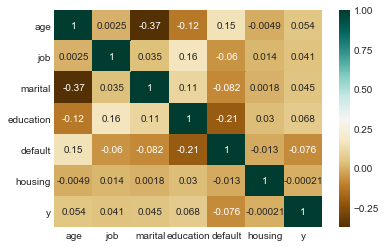

In [281]:
g = sns.heatmap(dataset[["age",'job', 'marital', 'education', 'default', 'housing', "y"]].corr(),cmap="BrBG",annot=True)

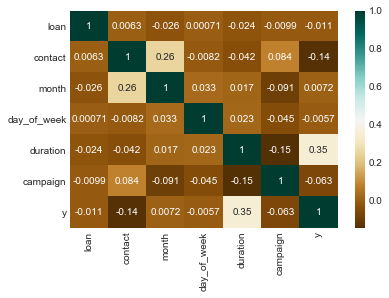

In [282]:
g = sns.heatmap(dataset[["loan",'contact', 'month', 'day_of_week', 'duration', 'campaign', "y"]].corr(),cmap="BrBG",annot=True)





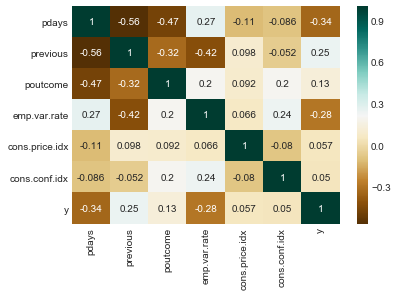

In [285]:
g = sns.heatmap(dataset[["pdays",'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', "y"]].corr(),cmap="BrBG",annot=True)

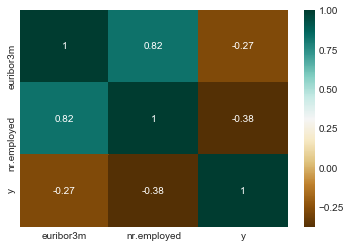

In [295]:
g = sns.heatmap(dataset[['euribor3m', 'nr.employed', "y"]].corr(),cmap="BrBG",annot=True)

## 5. Predictions

In [317]:
from sklearn.feature_selection import SelectKBest, chi2

### 5.1 训练集和测试集

In [302]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'AgeBand',
       'price_idx', 'conf_idx', 'euribor3m_temp', 'nr.employed_temp'],
      dtype='object')

In [304]:
dataset = dataset.drop(['AgeBand', 'nr.employed_temp', 'euribor3m_temp', 'conf_idx', 'price_idx'], axis=1)

In [313]:
Y_dset = dataset['y']
X_dset = dataset.drop('y', axis=1)

In [314]:
Y_dset.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [315]:
X_dset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,1,1,2,0,2,0,0,6,0,3,0,6,0,1,3,1,0,0,2
1,1,2,2,3,0,0,0,1,6,0,2,1,6,0,1,1,3,3,3,3
2,0,2,1,3,0,2,0,1,4,4,2,0,6,0,1,2,4,1,3,3
3,1,2,1,2,0,1,1,1,4,0,0,1,6,0,1,2,4,1,3,3
4,2,0,1,6,0,2,0,0,7,1,1,0,6,0,1,0,1,1,3,3


In [325]:
train_X = X_dset
train_y = Y_dset

In [326]:
n_splits = 8
Kfold = StratifiedKFold(n_splits=n_splits)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(xgb.XGBClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, train_X, y=train_y, scoring='accuracy', cv=Kfold, n_jobs=4))
cv_means = []

cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

print(cv_means)
print('-'*20)
print (cv_std)

[0.902449447227824, 0.8786705829356529, 0.8723071603429433, 0.9024556939065962, 0.9122548209207519, 0.9112777938098834, 0.9102892307446433]
--------------------
[0.008145905248413353, 0.011559092647811457, 0.015393209266517043, 0.011083771243346231, 0.010728757534271032, 0.008037456830681617, 0.01226649210072314]


### 5.1 Features selection

从前面的热度图上可以看到和y相关性比较高的几个feature有
1. nr.employed
2. euribor3m
3. emp.var.rate
4. poutcome
5. previous
6. pdays
7. duration
8. contact
...

In [329]:
X_new = SelectKBest(chi2, k=8).fit_transform(X_dset, Y_dset)

In [330]:
train_X = X_new
train_y = Y_dset

In [331]:
n_splits = 8
Kfold = StratifiedKFold(n_splits=n_splits)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(xgb.XGBClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, train_X, y=train_y, scoring='accuracy', cv=Kfold, n_jobs=4))
cv_means = []

cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

print(cv_means)
print('-'*20)
print (cv_std)

[0.9066151602606217, 0.9117617319016311, 0.9147024343822627, 0.9132371373072199, 0.9147024362669147, 0.9127469449980923, 0.9132337741458776]
--------------------
[0.006674573744006174, 0.008910792174896142, 0.009384795997445895, 0.007300093061812059, 0.01124695993859499, 0.008917062813625396, 0.009143633192874827]


In [370]:
n_splits = 8
Kfold = StratifiedKFold(n_splits=n_splits)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(xgb.XGBClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, train_X, y=train_y, scoring='roc_auc', cv=Kfold, n_jobs=4))
cv_means = []

cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

print(cv_means)
print('-'*20)
print (cv_std)

[0.8601573050337015, 0.8914631073772044, 0.9070299336637245, 0.9193151778209204, 0.9278920993457456, 0.9172424054666227, 0.9282866971763291]
--------------------
[0.03153697149394438, 0.014905307807259956, 0.016214684308890552, 0.014590368233095612, 0.010587814911401722, 0.012486211659438627, 0.011478247740787751]


In [371]:
print(cv_results)

[array([0.8516876 , 0.83901038, 0.83965938, 0.85771318, 0.89118549,
       0.80465308, 0.89799009, 0.89935923]), array([0.87774725, 0.89049717, 0.90516834, 0.89799009, 0.91248427,
       0.86563877, 0.87993628, 0.90224269]), array([0.90380691, 0.90750865, 0.90827565, 0.93193439, 0.91285793,
       0.87450834, 0.89500079, 0.92234682]), array([0.90555338, 0.91614223, 0.90843298, 0.94223962, 0.94324261,
       0.91057662, 0.90528634, 0.92304766]), array([0.91326531, 0.92933842, 0.92461847, 0.94448159, 0.92125551,
       0.91523757, 0.93557269, 0.93936724]), array([0.90431711, 0.91688955, 0.92634912, 0.94129563, 0.91352659,
       0.91089128, 0.89976007, 0.92490989]), array([0.91271586, 0.93124607, 0.92402848, 0.94601558, 0.92406781,
       0.91248427, 0.93476636, 0.94096916])]


In [372]:
n_splits = 8
Kfold = StratifiedKFold(n_splits=n_splits)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(xgb.XGBClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, train_X, y=train_y, scoring='average_precision', cv=Kfold, n_jobs=4))
cv_means = []

cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

print(cv_means)
print('-'*20)
print (cv_std)

[0.5468502545329135, 0.549391169030957, 0.5737634899015308, 0.5847555616391173, 0.6097683983486851, 0.5851976000253926, 0.6168987743167764]
--------------------
[0.06334139264834167, 0.050135358286807846, 0.06195116071798885, 0.04543289272290829, 0.035525574193636056, 0.04017771975855314, 0.036743108475243154]


这里我们可以看到feature 如果减小到了8个，效果反而要好了一些。其中上面用到了很多的分类方法，我们如果对他们进行调参数处理，效果可能还要好很多。

In [352]:
from scipy import interp
from itertools import cycle
from sklearn import metrics

auc 0.9058823529411765
59
21
0.9058823529411765
auc 0.8686274509803922
59
70
0.8686274509803922
auc 0.888235294117647
59
54
0.888235294117647
auc 0.9019607843137255
59
29
0.9019607843137255
auc 0.9294117647058824
59
33
0.9294117647058824
auc 0.9137254901960784
59
35
0.9137254901960784
auc 0.9176470588235294
59
31
0.9176470588235294


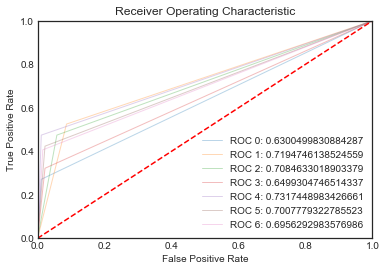

In [365]:
x_train, x_test, y_train, y_test = train_test_split(X_dset, Y_dset, test_size=0.125, random_state=42)
tprs = []
aucs = []

i = 0
for clf in classifiers:
    probas = clf.fit(x_train, y_train).predict(x_test)
    print("auc", metrics.accuracy_score(y_test, probas))
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    auc = metrics.roc_auc_score(y_test, probas)
    print(metrics.accuracy_score(y_test, probas))
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC {}: {}'.format(i, auc))
    i += 1
    
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5.3 对负样本进行下采样

In [373]:
import random

In [376]:
yes_data = dataset[dataset['y'] == 1]
no_data = dataset[dataset['y'] == 0].sample(len(yes_data))
print(len(yes_data), len(no_data))

447 447


In [378]:
balance_dataset = pd.concat([yes_data, no_data])

In [379]:
Y_bdset = dataset['y']
X_bdset = dataset.drop('y', axis=1)

In [383]:
n_splits = 4
Kfold = StratifiedKFold(n_splits=n_splits)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(xgb.XGBClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_bdset, y=Y_bdset, scoring='precision', cv=Kfold, n_jobs=4))
cv_means = []

cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

print(cv_means)
print('-'*20)
print (cv_std)

[0.6726620933327215, 0.4128625381617508, 0.44886452443944774, 0.5703860431683012, 0.6620061223451054, 0.6524125874125875, 0.6810426571525929]
--------------------
[0.04369939615745196, 0.013024008726937942, 0.0228438593967044, 0.04311032602493965, 0.03633747965823291, 0.03324336849662905, 0.04273814823755473]


auc 0.9058823529411765
0.9058823529411765
auc 0.8686274509803922
0.8686274509803922
auc 0.888235294117647
0.888235294117647
auc 0.9019607843137255
0.9019607843137255
auc 0.9294117647058824
0.9294117647058824
auc 0.9137254901960784
0.9137254901960784
auc 0.9176470588235294
0.9176470588235294


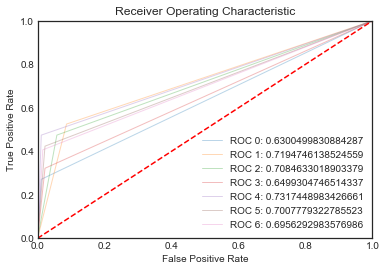

In [384]:
x_train, x_test, y_train, y_test = train_test_split(X_bdset, Y_bdset, test_size=0.125, random_state=42)
tprs = []
aucs = []

i = 0
for clf in classifiers:
    probas = clf.fit(x_train, y_train).predict(x_test)
    print("auc", metrics.accuracy_score(y_test, probas))
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    auc = metrics.roc_auc_score(y_test, probas)
    print(metrics.accuracy_score(y_test, probas))
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC {}: {}'.format(i, auc))
    i += 1
    
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()